<a href="https://colab.research.google.com/github/RofiqAulia/Machine-Learning/blob/main/Week3_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praktikum 1**

Klasifikasi SVM dengan Data Dummy

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

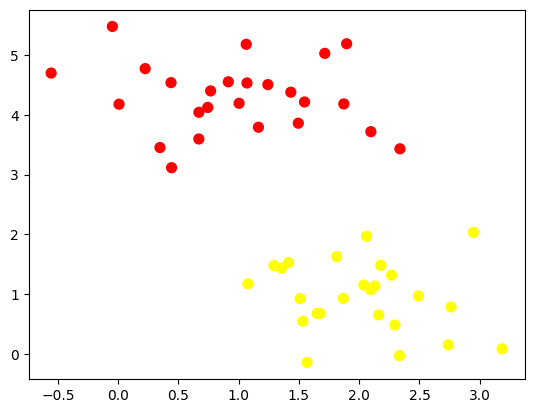

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

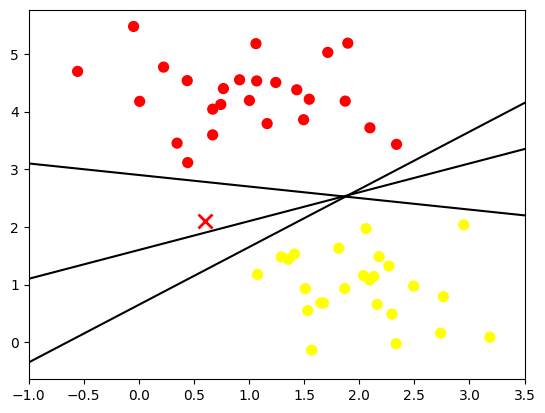

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

In [4]:
(-1.0, 3.5)

(-1.0, 3.5)

(-1.0, 3.5)

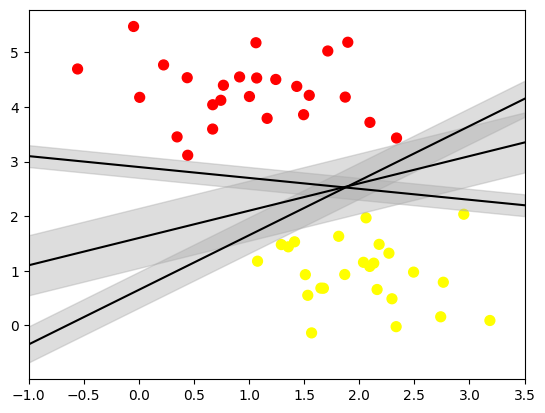

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [6]:
(-1.0, 3.5)

(-1.0, 3.5)

**Penerappan fitting SVM**

In [7]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

In [11]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [13]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

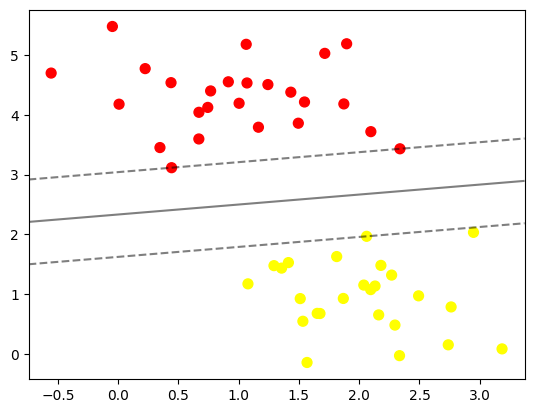

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [15]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

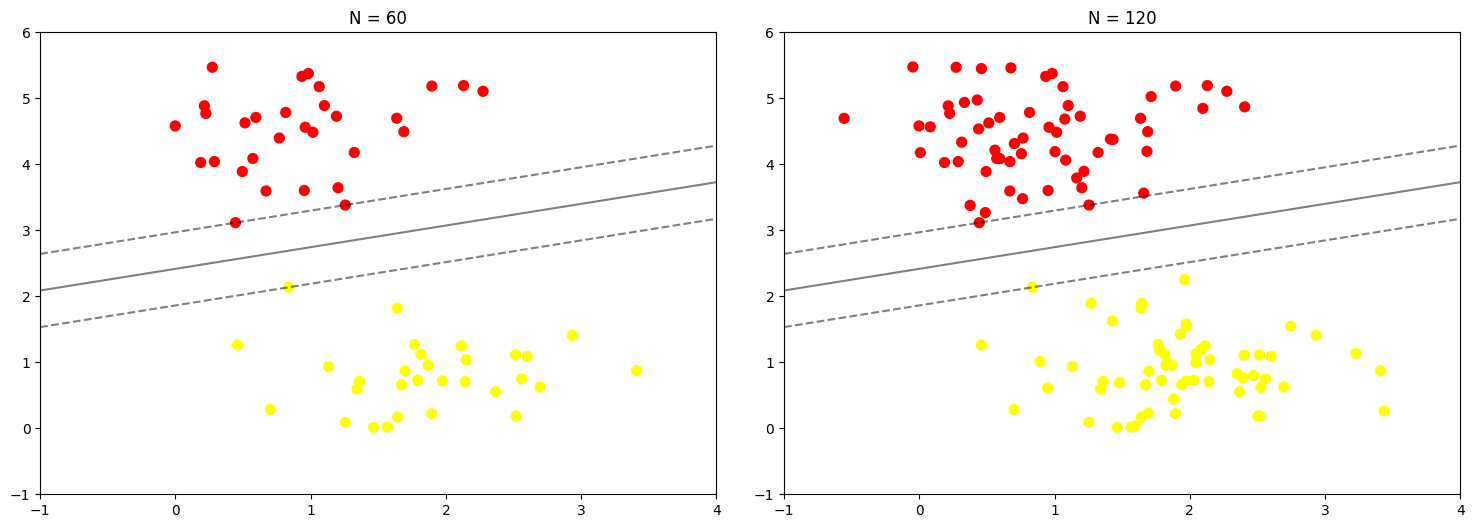

In [17]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

**Data Tidak Terpisah Secara Linier**

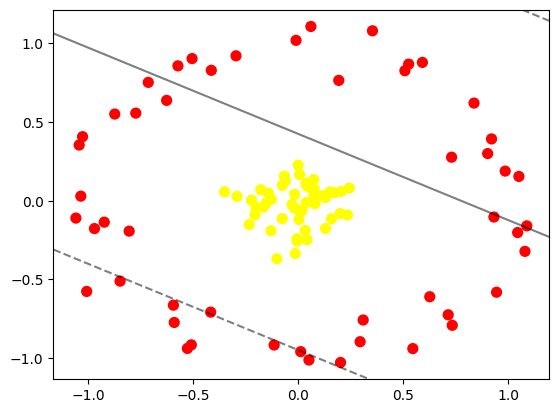

In [18]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [24]:
r = np.exp(-(X ** 2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

In [ ]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [ ]:
interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

In [ ]:
<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.11710337e-01, -4.96366283e-01],
       [ 7.27539244e-01, -7.04340110e-01],
       [ 1.15377033e+00,  4.22281369e-02],
       [-1.93508568e-02, -2.45661004e-03],
       [-2.84303065e-02, -8.12580465e-02],
       [ 5.47108604e-03, -1.23375502e-01],
       [-4.16440568e-02, -2.99573424e-02],
       [-5.82375560e-01, -9.38192480e-01],
       [-8.27126076e-01,  5.42230072e-01],
       [ 7.85210547e-01,  4.54940992e-01],
       [-3.88559391e-01,  3.84652903e-02],
       [-3.42088050e-01,  8.55511799e-01],
       [-4.81425570e-02, -1.59928417e-01],
       [ 1.87022047e-03,  1.89494319e-01],
       [-9.69086983e-03,  1.17829251e-01],
       [-7.84345928e-01, -4.66479993e-01],
       [ 6.85107055e-02,  1.77194939e-01],
       [ 1.72857740e-01,  4.38177465e-02],
       [-8.12998991e-01, -7.19923857e-01],
       [-2.01575223e-01, -2.39583752e-02],
       [-9.75925418e-01,  2.60953744e-01],
       [-4.13054659e-02,  2.00812665e-01],
       [ 7.13340431e-01, -8.16168303e-01],
       [ 3.64574410e-02, -1.07939842e+00],
       [-1.54397411e-01,  4.40008002e-02],
       [-4.93135049e-01,  8.08010876e-01],
       [ 1.45393445e-01, -1.46592893e-02],
       [-8.21113259e-01,  6.26589314e-01],
       [-8.27379977e-01, -2.75044907e-01],
       [ 9.48902221e-02, -6.27649995e-02],
       [-2.21554724e-02,  1.01028554e-01],
       [-1.09030379e+00,  6.74538986e-02],
       [ 1.55846639e-01,  1.61971599e-01],
       [-9.13666743e-02, -7.04703795e-02],
       [-8.13169827e-01, -5.03526231e-01],
       [ 4.07881892e-01, -7.07374192e-01],
       [-2.69630418e-01, -1.19784632e+00],
       [-8.71995956e-01, -2.28090950e-01],
       [ 3.93399315e-02,  9.72349031e-01],
       [ 8.35245788e-02,  9.58777109e-03],
       [ 1.01780488e+00, -3.43266966e-02],
       [-3.03151481e-01,  5.05179111e-02],
       [ 7.29975189e-02, -2.79509483e-01],
       [ 1.18741375e-02, -1.83848700e-02],
       [ 1.21826951e-02, -4.98787854e-02],
       [-5.11708040e-01, -8.51074760e-01],
       [ 2.41015661e-01, -4.71012997e-03],
       [ 6.90842546e-01,  8.45957622e-01],
       [-1.11030618e-02, -2.35284175e-01],
       [ 8.39749655e-01,  5.63132132e-01],
       [ 8.61108999e-02,  9.49359269e-01],
       [-7.34090929e-02, -2.07504095e-01],
       [ 6.60956273e-02,  3.87593881e-01],
       [ 3.19380104e-01, -1.03269710e+00],
       [ 5.29011856e-03,  5.08287163e-02],
       [-1.52505024e-02,  9.80360676e-02],
       [ 3.30861296e-01,  1.01634300e+00],
       [ 7.08355114e-02,  2.95618673e-01],
       [ 4.51967451e-01,  8.62692136e-01],
       [-7.30276209e-02, -9.40698117e-01],
       [-1.88912212e-01, -2.39175141e-02],
       [ 1.44720944e-01,  1.18452174e+00],
       [ 5.32671697e-02, -1.09540084e-01],
       [ 2.48016942e-02, -3.08731322e-01],
       [-5.61754363e-02, -1.10575612e-02],
       [-1.81478209e-02,  1.88981091e-01],
       [-3.90760142e-01,  9.17806040e-01],
       [-5.97653736e-02, -1.22911470e+00],
       [-1.16245908e+00,  3.07466341e-01],
       [-2.53459621e-01,  9.62177787e-01],
       [-2.67966216e-02, -5.15756373e-02],
       [-1.88229489e-04, -1.99898237e-01],
       [ 1.16661531e-01, -1.57798693e-01],
       [-1.21836026e-01, -1.68045549e-01],
       [ 1.02023011e-01,  9.51238087e-03],
       [ 2.76691140e-02,  2.35529803e-01],
       [-6.96873537e-01,  7.33320715e-01],
       [ 1.00916206e+00, -4.53327793e-01],
       [ 1.01853684e+00, -3.31902619e-01],
       [ 5.66691765e-01,  8.72696245e-01],
       [ 8.47878444e-01,  3.29580343e-01],
       [ 9.12248953e-01, -3.59369459e-01],
       [ 2.23464288e-01, -9.28408565e-01],
       [-1.34216871e-01,  2.34427080e-02],
       [-1.25646754e-01, -2.43748701e-01],
       [ 9.88629144e-01, -7.15813419e-02],
       [ 3.14491126e-01, -8.06705684e-01],
       [ 6.02048609e-01,  9.44127099e-01],
       [-9.81202450e-01,  1.21225826e-01],
       [ 2.70639526e-02,  5.70377390e-02],
       [-8.06006784e-02, -1.82845293e-01],
       [ 4.60760700e-02, -1.17021890e-01],
       [-2.81166812e-01,  2.53371733e-01],
       [-8.57977773e-01, -9.05159358e-01],
       [ 1.84687093e-01,  9.10867575e-03],
       [ 8.16628676e-01,  4.68389299e-02],
       [ 4.76247020e-02, -3.81171893e-02],
       [ 7.20594596e-01, -5.19359481e-01],
       [-8.64587235e-01,  7.40524241e-01],
       [-9.46013036e-02,  8.56559489e-02]]), y=array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]))>

In [25]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

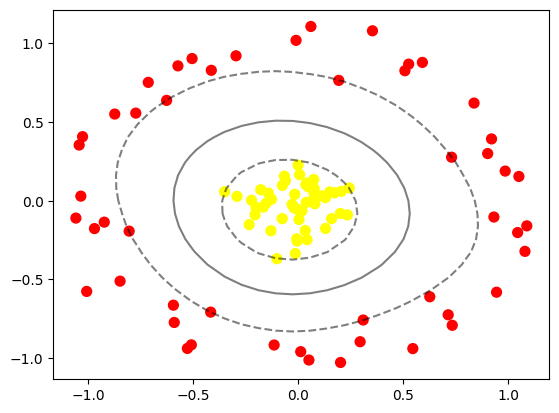

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

**Data Overlap**

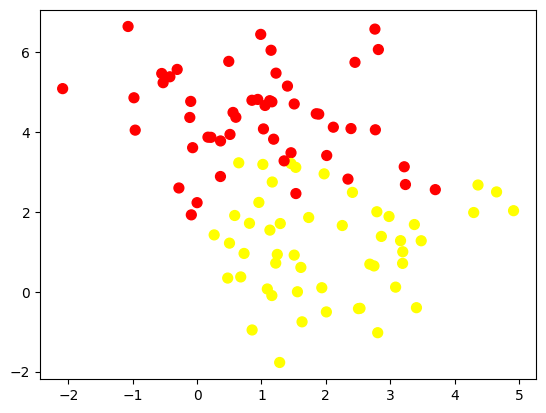

In [27]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

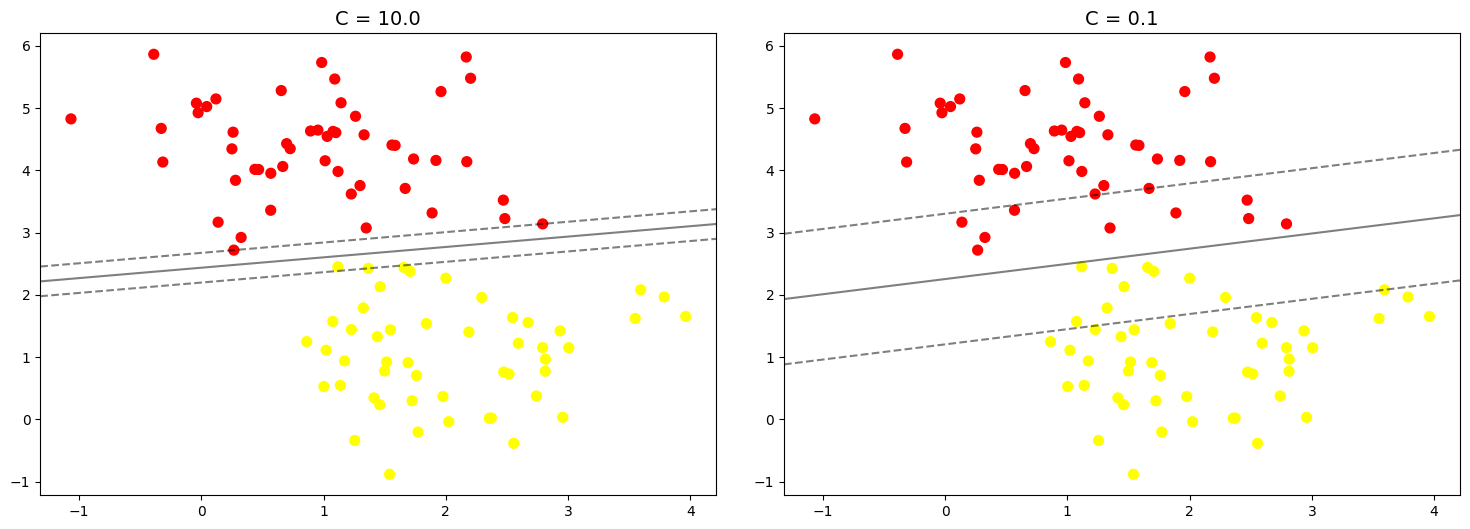

In [28]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)